<a href="https://colab.research.google.com/github/Nniichha/229352-StatisticalLearning/blob/main/229351_LAB11_02_660510739.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [5]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

  Using cached statsmodels-0.13.1.tar.gz (18.1 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-24 13:06:20--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.03s   

2025-09-24 13:06:21 (4.29 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [7]:
!pip3 install pmdarima

In [8]:
# import module ที่ต้องใช้
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [10]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
from datetime import datetime

def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.head()

,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [11]:
y = data['MaxTemp'].resample("M").mean()

In [12]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [13]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


In [14]:
p_range = range(0,3)
d_range = range(0,2)
q_range = range(0,3)
P_range = range(0,2)
D_range = range(0,2)
Q_range = range(0,2)
s = 12

best_aic = np.inf
best_order = None
best_seasonal = None
best_model = None

for p in p_range:
    for d in d_range:
        for q in q_range:
            for P in P_range:
                for D in D_range:
                    for Q in Q_range:
                        try:
                            model = SARIMAX(train,
                                            order=(p,d,q),
                                            seasonal_order=(P,D,Q,s),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            res = model.fit(disp=False)
                            if res.aic < best_aic:
                                best_aic = res.aic
                                best_order = (p,d,q)
                                best_seasonal = (P,D,Q,s)
                                best_model = res
                        except:
                            continue

print("Best AIC:", best_aic)
print("Best order (p,d,q):", best_order)
print("Best seasonal (P,D,Q,s):", best_seasonal)

Best AIC: 635.0656413413583
Best order (p,d,q): (1, 0, 2)
Best seasonal (P,D,Q,s): (0, 1, 1, 12)


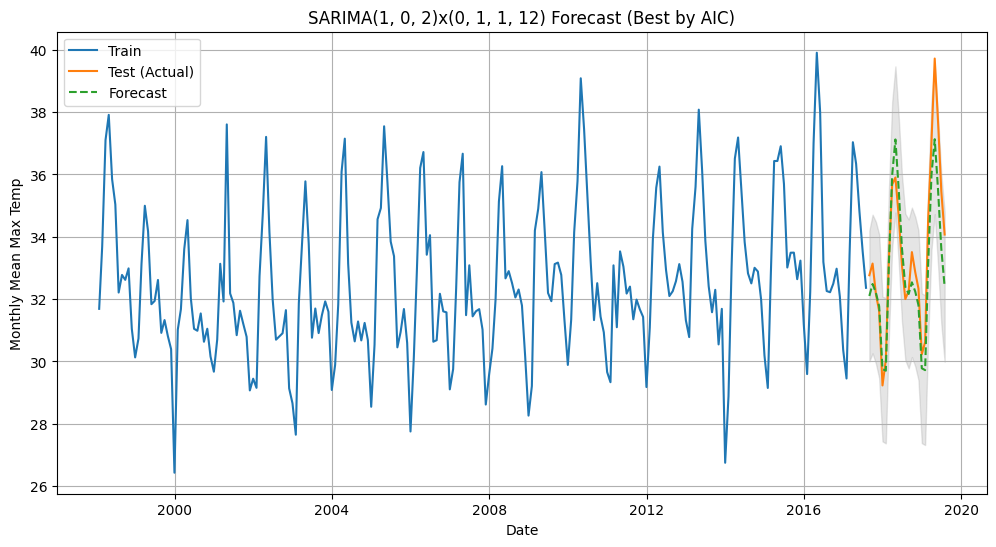

In [15]:
pred = best_model.get_forecast(steps=len(test))
fc = pred.predicted_mean
conf_int = pred.conf_int()

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test (Actual)")
plt.plot(fc.index, fc, label="Forecast", linestyle="--")
plt.fill_between(fc.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color="gray", alpha=0.2)
plt.legend()
plt.title(f"SARIMA{best_order}x{best_seasonal} Forecast (Best by AIC)")
plt.xlabel("Date")
plt.ylabel("Monthly Mean Max Temp")
plt.grid(True)
plt.show()